In [ ]:
!git clone https://github.com/CSE-151A-Group-Wildfire/CSE-151A-Project.git

Cloning into 'CSE-151A-Project'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 0), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 8.15 MiB | 2.75 MiB/s, done.
Updating files: 100% (3/3), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
weather = pd.read_csv('CSE-151A-Project/weather.csv')
wildfires = pd.read_csv('CSE-151A-Project/wildfire.csv')

<ipython-input-5-a6b0140fb6e6>:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('CSE-151A-Project/weather.csv')


Columns to keep: Date, Time, air-temp, wind_speed, relative_humidity, sea_level_pressure

In [ ]:
weather_df = weather[['date_time', 'air_temp', 'wind_speed', 'relative_humidity', 'sea_level_pressure']]
weather_df

,date_time,air_temp,wind_speed,relative_humidity,sea_level_pressure
0,NaN,Fahrenheit,Miles/hour,%,Millibars
1,05/20/24-02:47PM,60.08,0,74.59,1016.1
2,05/20/24-01:47PM,60.08,0,74.59,1015.5
3,05/20/24-12:47PM,59,0,77.52,1014.9
4,05/20/24-11:47AM,59,0,77.52,1014.7
...,...,...,...,...,...
261074,01/11/00-03:45AM,54.0,0.0,93.0,1018.8
261075,01/11/00-02:45AM,55.9,0.0,86.5,1018.4
261076,01/11/00-01:45AM,57.0,0.0,83.2,1018.3
261077,01/10/00-10:45PM,63.0,4.61,62.6,1018.2


Columns to keep: incident_name, incident_date_created, incident_date_extinguished, incident_county, incident_acres_burned

In [ ]:
wildfires_df = wildfires[['incident_name','incident_date_created','incident_date_extinguished', 'incident_county', 'incident_acres_burned']]
wildfire_LA = wildfires_df[wildfires_df['incident_county'] == 'Los Angeles']
wildfire_LA

,incident_name,incident_date_created,incident_date_extinguished,incident_county,incident_acres_burned
15,Lake Fire,2013-05-17T13:23:00Z,2013-05-18T19:00:00Z,Los Angeles,712.0
27,Magic Fire,2013-05-28T11:30:00Z,2013-05-29T15:30:00Z,Los Angeles,149.0
36,Powerhouse Fire,2013-05-30T15:28:00Z,2013-06-08T18:30:00Z,Los Angeles,30274.0
117,Madre Fire,2013-09-23T18:00:00Z,2013-09-28T08:00:00Z,Los Angeles,268.0
144,Colby Fire,2014-01-16T05:50:00Z,2014-01-27T10:00:00Z,Los Angeles,1952.0
...,...,...,...,...,...
2385,Columbia Fire,2024-06-26T16:04:14Z,NaN,Los Angeles,356.0
2405,Indigo Fire,2024-06-30T14:25:35Z,NaN,Los Angeles,22.0
2412,Sunrise Fire,2024-07-01T14:29:58Z,2024-07-03T08:45:00Z,Los Angeles,35.0
2435,Adrian Fire,2024-07-03T19:40:53Z,NaN,Los Angeles,80.0


In [ ]:
# Convert the date columns to datetime
weather_df['date_time'] = pd.to_datetime(weather_df['date_time'], format='%m/%d/%y-%I:%M%p', errors='coerce')
wildfire_LA['incident_date_created'] = pd.to_datetime(wildfire_LA['incident_date_created'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
wildfire_LA['incident_date_extinguished'] = pd.to_datetime(wildfire_LA['incident_date_extinguished'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')


# Extract only the date part
weather_df['date'] = weather_df['date_time'].dt.date
wildfire_LA['date'] = wildfire_LA['incident_date_created'].dt.date

# Merge the DataFrames on the date column
merged_df = pd.merge(weather_df, wildfire_LA, left_on='date', right_on='date', how='inner')

# Drop the extra datetime columns
merged_df.drop(columns=['date_time'], inplace=True)

#Adding a column year to the dataframe
merged_df['year'] = pd.to_datetime(merged_df['date']).dt.year

#Set Date as the index
merged_df.set_index('date', inplace=True)

merged_df

<ipython-input-8-c2547ba8d439>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['date_time'] = pd.to_datetime(weather_df['date_time'], format='%m/%d/%y-%I:%M%p', errors='coerce')
<ipython-input-8-c2547ba8d439>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wildfire_LA['incident_date_created'] = pd.to_datetime(wildfire_LA['incident_date_created'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
<ipython-input-8-c2547ba8d439>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,air_temp,wind_speed,relative_humidity,sea_level_pressure,incident_name,incident_date_created,incident_date_extinguished,incident_county,incident_acres_burned,year
date,,,,,,,,,,
2023-07-25,87.08,4.6,41.72,1012.4,Victor Fire,2023-07-25 15:25:00,2023-07-27 08:22:04,Los Angeles,70.0,2023
2023-07-25,87.08,4.6,41.72,1012.4,Agua Fire,2023-07-25 14:17:00,2023-08-07 18:00:00,Los Angeles,421.0,2023
2023-07-25,87.98,3.45,43.48,1012.8,Victor Fire,2023-07-25 15:25:00,2023-07-27 08:22:04,Los Angeles,70.0,2023
2023-07-25,87.98,3.45,43.48,1012.8,Agua Fire,2023-07-25 14:17:00,2023-08-07 18:00:00,Los Angeles,421.0,2023
2023-07-25,89.06,6.91,42.03,1013.2,Victor Fire,2023-07-25 15:25:00,2023-07-27 08:22:04,Los Angeles,70.0,2023
...,...,...,...,...,...,...,...,...,...,...
2013-05-17,62.06,0.0,72.36,1013.4,Lake Fire,2013-05-17 13:23:00,2013-05-18 19:00:00,Los Angeles,712.0,2013
2013-05-17,62.06,0.0,72.36,1013.2,Lake Fire,2013-05-17 13:23:00,2013-05-18 19:00:00,Los Angeles,712.0,2013
2013-05-17,62.96,5.75,70.11,1012.7,Lake Fire,2013-05-17 13:23:00,2013-05-18 19:00:00,Los Angeles,712.0,2013


array([[<Axes: title={'center': 'incident_date_created'}>,
        <Axes: title={'center': 'incident_date_extinguished'}>],
       [<Axes: title={'center': 'incident_acres_burned'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

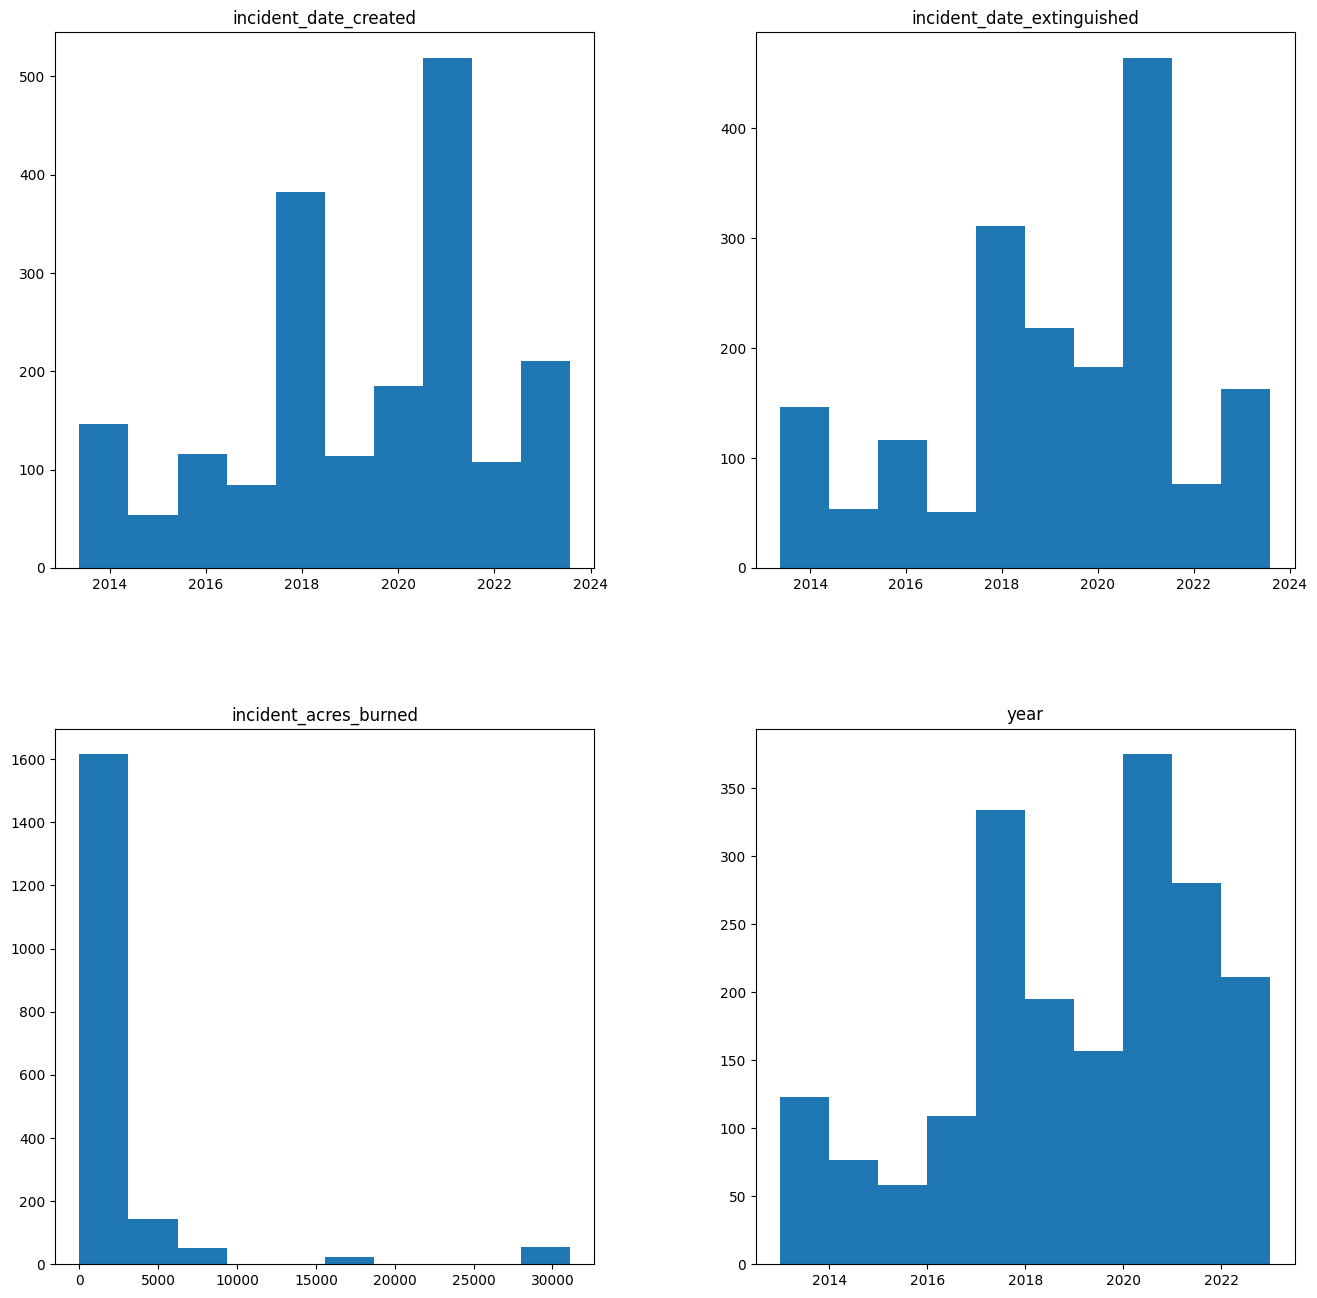

In [ ]:
merged_df.hist(figsize = (16, 16), grid = False)

In [ ]:
print(merged_df.isna().sum())

air_temp                       14
wind_speed                     37
relative_humidity              14
sea_level_pressure            267
incident_name                   0
incident_date_created           0
incident_date_extinguished      0
incident_county                 0
incident_acres_burned          32
year                            0
dtype: int64


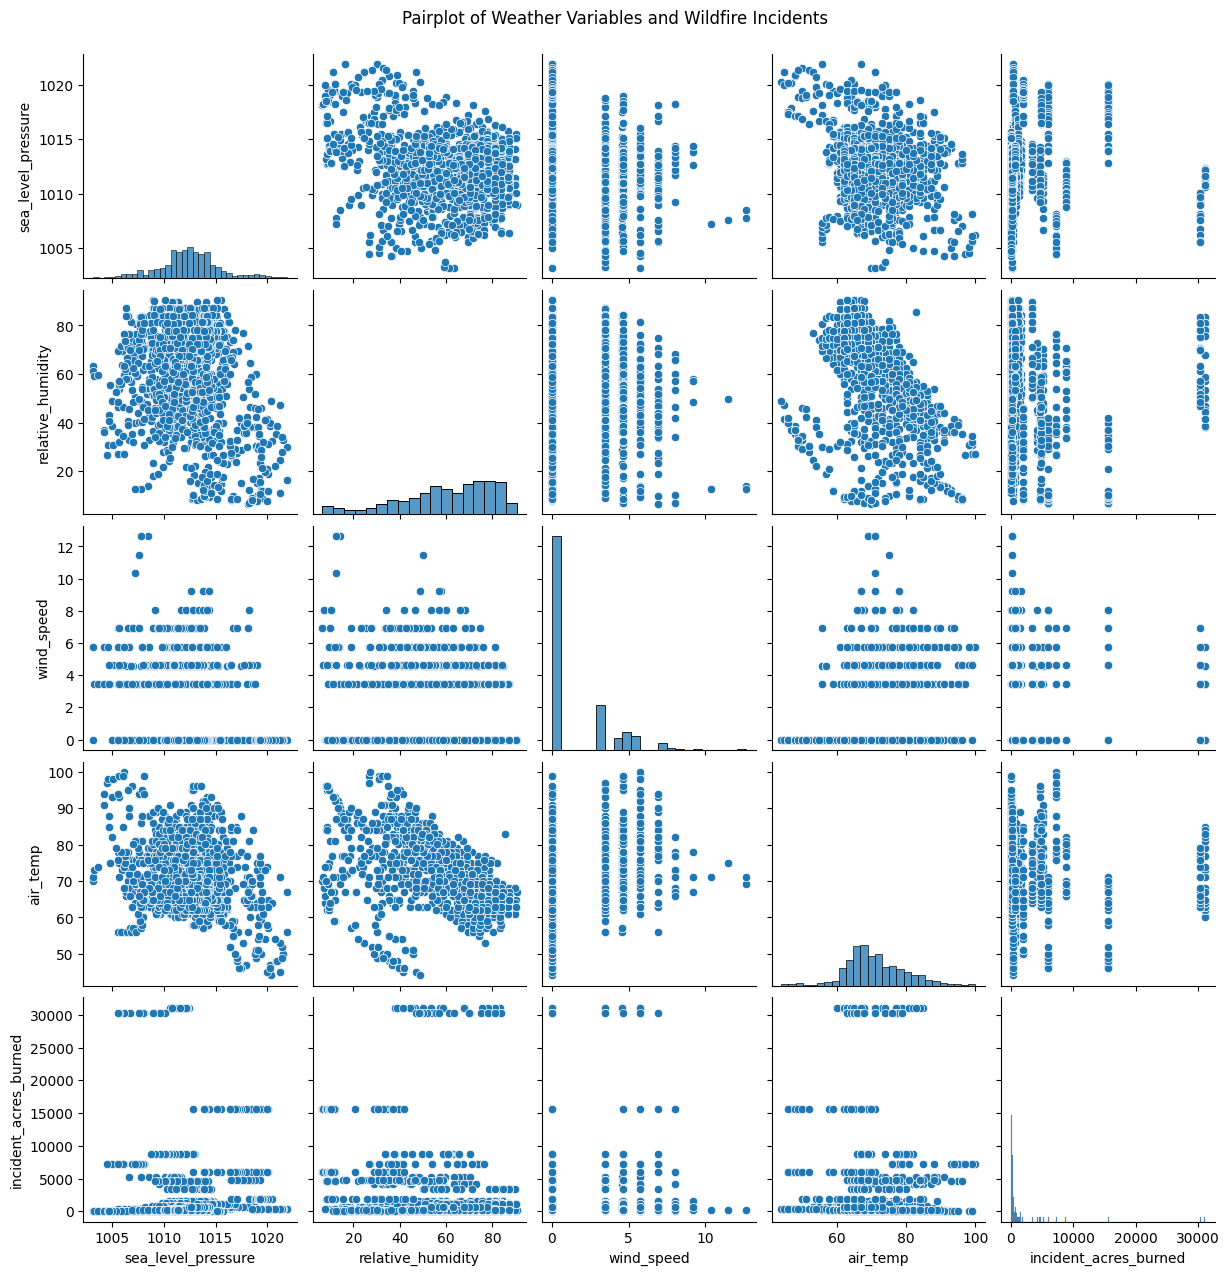

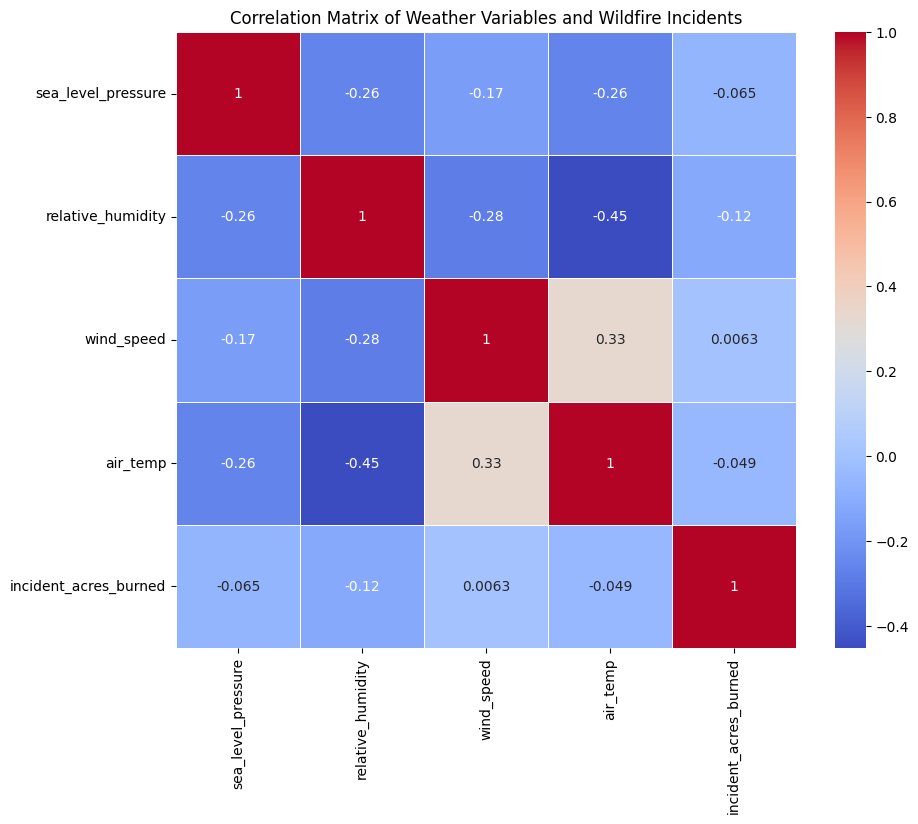

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the date columns to datetime
weather_df.loc[:, 'date_time'] = pd.to_datetime(weather_df['date_time'], format='%m/%d/%y-%I:%M%p', errors='coerce')
wildfire_LA.loc[:, 'incident_date_created'] = pd.to_datetime(wildfire_LA['incident_date_created'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

# Extract data
weather_df.loc[:, 'date'] = weather_df['date_time'].dt.date
wildfire_LA.loc[:, 'date'] = wildfire_LA['incident_date_created'].dt.date

# Merge the DataFrames on the date column
merged_df = pd.merge(weather_df, wildfire_LA, left_on='date', right_on='date', how='inner')

# Drop the extra datetime columns
merged_df.drop(columns=['date_time', 'incident_date_created'], inplace=True)

# Set the date column as index
merged_df.set_index('date', inplace=True)

# Define the columns to be included in the correlation plot
columns_of_interest = ['sea_level_pressure', 'relative_humidity', 'wind_speed', 'air_temp', 'incident_acres_burned']

# Clean the data to ensure we only have numeric values
merged_df = merged_df.dropna(subset=columns_of_interest)
merged_df = merged_df[(merged_df[columns_of_interest].applymap(lambda x: isinstance(x, (int, float)))).all(axis=1)]

# Pairplot
sns.pairplot(merged_df[columns_of_interest])
plt.suptitle("Pairplot of Weather Variables and Wildfire Incidents", y=1.02)
plt.show()

# Heatmap
correlation_matrix = merged_df[columns_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix of Weather Variables and Wildfire Incidents")
plt.show()

We can see that there are some correlations between wind_speed & air_temp and acres_burned and wind_speed.